Below is the analysis results of three RQs, 

## RQ1. Contributors in DL Communities

In [1]:
# import necessary libraries
import sys
import pandas as pd
sys.path.append("../")
from rq1_contributors_in_DLCommunities import generate_developers_with_roles, venn_graph
from rq2_Evolution_of_DLCommunities import Plotter
from data_preprocessing.longitudinal_data_generation import  generate_longitudinal_data
from data_preprocessing.classification import kappa_calculation, role_classification, get_pcmci_analysis_data, draw_kappa_matrix
from rq3_Impact_of_Community_Characteristics import load_and_process_data, causal_inference
# from data_preprocessing.classification import get_pcmci_analysis_data


<frozen importlib._bootstrap>:241: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


### role classification

In [2]:
contribution_table_pytorch = pd.read_csv("../../data/contributions/global/pytorch.csv")
role_classification_pytorch = role_classification(contribution_table_pytorch)
df = role_classification_pytorch[0]
df['core_set'] = df['core_set'].apply(len)
df['peripheral_set'] = df['peripheral_set'].apply(len)
# df['active_set'] = df['active_set'].apply(len)
print(df)
print(len(role_classification_pytorch[1]), len(role_classification_pytorch[2]), len(role_classification_pytorch[3]), len(role_classification_pytorch[4]))
print(df['core_set']/len(role_classification_pytorch[3]))
print(df['peripheral_set']/len(role_classification_pytorch[3]))

           metric  core_set  peripheral_set  \
0    commit_count       191            2601   
1             LOC       110            2682   
2     issue_count       205            2587   
3  central_degree       107            2685   

                                          active_set  
0  {quanasi, anandadalton, Qinka, LvJC, haoransh,...  
1  {quanasi, anandadalton, Qinka, LvJC, haoransh,...  
2  {quanasi, anandadalton, Qinka, LvJC, haoransh,...  
3  {quanasi, anandadalton, Qinka, LvJC, haoransh,...  
254 2538 2792 9826
0    0.068410
1    0.039398
2    0.073424
3    0.038324
Name: core_set, dtype: float64
0    0.931590
1    0.960602
2    0.926576
3    0.961676
Name: peripheral_set, dtype: float64


In [12]:
contribution_table_tensorflow = pd.read_csv("../../data/contributions/global/tensorflow.csv")
role_classification_tensorflow = role_classification(contribution_table_tensorflow)
df = role_classification_tensorflow[0]
df['core_set'] = df['core_set'].apply(len)
df['peripheral_set'] = df['peripheral_set'].apply(len)
# df['active_set'] = df['active_set'].apply(len)
print(df)
print(len(role_classification_tensorflow[1]), len(role_classification_tensorflow[2]), len(role_classification_tensorflow[3]), len(role_classification_tensorflow[4]))
print(df['core_set']/len(role_classification_tensorflow[3]))
print(df['peripheral_set']/len(role_classification_tensorflow[3]))

           metric  core_set  peripheral_set  \
0    commit_count       260            3028   
1             LOC       130            3158   
2     issue_count       628            2660   
3  central_degree       178            3110   

                                          active_set  
0  {CalendulaED, joyicejin, crownk1997, derNorweg...  
1  {CalendulaED, joyicejin, crownk1997, derNorweg...  
2  {CalendulaED, joyicejin, crownk1997, derNorweg...  
3  {CalendulaED, joyicejin, crownk1997, derNorweg...  
805 2483 3288 19750
0    0.079075
1    0.039538
2    0.190998
3    0.054136
Name: core_set, dtype: float64
0    0.920925
1    0.960462
2    0.809002
3    0.945864
Name: peripheral_set, dtype: float64


### venn graph

In [13]:
data_path = '../../data/contributions/global/'
developers_with_roles = generate_developers_with_roles(data_path=data_path, choice='all')

developers_with_roles
developers_with_roles.to_csv('../../outputs/results/developer_with_roles.csv', index=False)

In [14]:
developers_with_roles

,developer,pytorch_role,tensorflow_role
0,coder3101,None,peripheral
1,nmjohn,None,peripheral
2,rohan100jain,None,core
3,brunomorishita,None,peripheral
4,Cheng-Cheng2,peripheral,None
...,...,...,...
5842,VertexC,peripheral,None
5843,adis300,None,peripheral
5844,tianzhi0549,peripheral,None
5845,surry,None,peripheral


In [15]:
# either pytorch_role or tensorflow_role is core
core_pytorch = developers_with_roles[developers_with_roles['pytorch_role'] == 'core']
core_tensorflow = developers_with_roles[developers_with_roles['tensorflow_role'] == 'core']
# combine two set
core_pytorch_tensorflow = pd.concat([core_pytorch, core_tensorflow])
core_pytorch_tensorflow = core_pytorch_tensorflow.drop_duplicates()
core_pytorch_tensorflow

,developer,pytorch_role,tensorflow_role
8,soumith,core,None
13,rgommers,core,None
17,v0dro,core,None
36,ifedan,core,None
78,wangkuiyi,core,peripheral
...,...,...,...
5815,yisitu,None,core
5824,AyanmoI,None,core
5825,yuanbopeng,None,core
5827,firejq,None,core


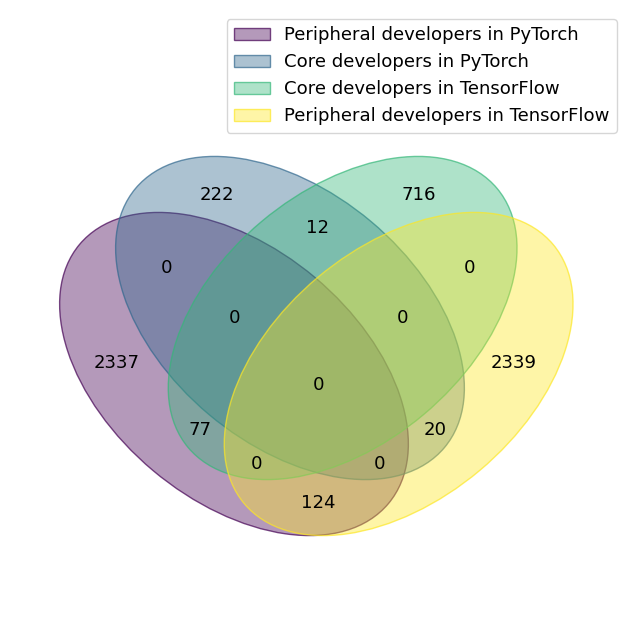

In [16]:
result_path = '../../outputs/figures/'
venn_graph(result_path, developers_with_roles)

### Spatial and Temporal Similarity

please check the file 'results_rq1_pr_similarity_analysis.ipynb' for the analysis code and result

## RQ2. Evolution of DL Communities

In [17]:
star_data_path = '../../data/raw/stars/'
save_dir = '../../outputs/figures/'
community_data_pytorch = pd.read_csv('../../data/contributions/releases/pytorch.csv')
star_data_pytorch = pd.read_csv('../../data/raw/stars/pytorch_releases.csv')
community_data_tensorflow = pd.read_csv('../../data/contributions/releases/tensorflow.csv')
star_data_tensorflow = pd.read_csv('../../data/raw/stars/tensorflow_releases.csv')
# star_data_pytorch.drop(0, inplace=True)
# star_data_tensorflow.drop(0, inplace=True)

In [18]:
# this may take a few minutes
longitudinal_data_pytorch = generate_longitudinal_data(community_data_pytorch, star_data_pytorch)
longitudinal_data_tensorflow = generate_longitudinal_data(community_data_tensorflow, star_data_tensorflow)
longitudinal_data_pytorch.to_csv('../../outputs/results/longitudinal_data_pytorch.csv', index=False)
longitudinal_data_tensorflow.to_csv('../../outputs/results/longitudinal_data_tensorflow.csv', index=False)

['0.2.0', '0.3.0', '0.4.0', '1.0.0', '1.1.0', '1.2.0', '1.3.0', '1.4.0', '1.5.0', '1.6.0', '1.7.0', '1.8.0', '1.9.0', '1.10.0', '1.11.0', '1.12.0']


/home/yunqichen/DLCommunity/deep_learning_communities/src/notebooks/../data_preprocessing/classification.py:152: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  role_transition_result = pd.concat(


    ratio_peri_core  ratio_active_dev retention_rate dropout_rate  \
0          5.532258          1.417284              0            0   
1          3.813953          2.265700       0.419355     0.193548   
2          4.130435          3.135593       0.534884     0.116279   
3          5.838710          3.523585        0.76087     0.021739   
4          4.100000          3.042017       0.629032     0.080645   
5          3.813559          3.066901       0.671429          0.1   
6          2.644068          2.855814       0.627119     0.084746   
7          2.301370          3.925311       0.762712     0.016949   
8          2.511111          2.699367       0.684932     0.123288   
9          2.606383          2.899705       0.755556     0.033333   
10         2.055046          2.966967       0.712766     0.053191   
11         2.203390          3.082011       0.779817     0.073394   
12         2.476636          2.591398       0.677966     0.067797   
13         2.241667          2.907

/home/yunqichen/DLCommunity/deep_learning_communities/src/notebooks/../data_preprocessing/classification.py:152: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  role_transition_result = pd.concat(


    ratio_peri_core  ratio_active_dev retention_rate dropout_rate  \
0          1.571429          5.074074              0            0   
1          1.794872          3.307339       0.547619     0.309524   
2          1.693878          4.113636       0.435897     0.320513   
3          1.790123          4.305310       0.428571     0.387755   
4          1.449367          3.891473       0.641975     0.197531   
5          1.681481          4.334254       0.411392     0.373418   
6          1.708609          3.645477       0.518519      0.22963   
7          1.482353          3.883886       0.562914     0.238411   
8          1.323529          4.197468       0.535294     0.247059   
9          1.885167          4.882255       0.564706     0.258824   
10         1.535294          3.542923       0.526316     0.258373   
11         0.995370          3.703016       0.617647     0.182353   
12         1.279412          4.204301       0.537037     0.175926   
13         1.258621          3.910

In [19]:
longitudinal_data_pytorch = pd.read_csv('../../outputs/results/longitudinal_data_pytorch.csv')
longitudinal_data_tensorflow = pd.read_csv('../../outputs/results/longitudinal_data_tensorflow.csv')

In [20]:
longitudinal_data_pytorch

,version,active_users,core_developers,peripheral_developers,retention_rate,inflow_rate,dropout_rate,ratio_peri_core,ratio_active_dev,core2peripheral_rate,inflow_rate.1,stars,release_date
0,0.2.0,574,62,343,0.000000,0.000000,0.000000,5.532258,1.417284,0.000000,0.000000,6216,2017.08.28
1,0.3.0,469,43,164,0.419355,0.395349,0.193548,3.813953,2.265700,0.274194,0.395349,8846,2017.12.05
2,0.4.0,740,46,190,0.534884,0.456522,0.116279,4.130435,3.135593,0.232558,0.456522,13022,2018.04.24
3,1.0.0,1494,62,362,0.760870,0.403226,0.021739,5.838710,3.523585,0.173913,0.403226,20357,2018.12.07
4,1.1.0,1086,70,287,0.629032,0.428571,0.080645,4.100000,3.042017,0.241935,0.428571,25640,2019.05.01
5,1.2.0,871,59,225,0.671429,0.186441,0.100000,3.813559,3.066901,0.142857,0.186441,28673,2019.08.08
6,1.3.0,614,59,156,0.627119,0.305085,0.084746,2.644068,2.855814,0.254237,0.305085,30352,2019.10.10
7,1.4.0,946,73,168,0.762712,0.260274,0.016949,2.301370,3.925311,0.135593,0.260274,33412,2020.01.16
8,1.5.0,853,90,226,0.684932,0.322222,0.123288,2.511111,2.699367,0.164384,0.322222,35968,2020.04.21
9,1.6.0,983,94,245,0.755556,0.223404,0.033333,2.606383,2.899705,0.155556,0.223404,38663,2020.07.28


In [21]:
longitudinal_data_tensorflow

,version,active_users,core_developers,peripheral_developers,retention_rate,inflow_rate,dropout_rate,ratio_peri_core,ratio_active_dev,core2peripheral_rate,inflow_rate.1,stars,release_date
0,0.6.0,548,42,66,0.000000,0.000000,0.000000,1.571429,5.074074,0.000000,0.000000,16303,2016.02.16
1,0.9.0,721,78,140,0.547619,0.705128,0.309524,1.794872,3.307339,0.071429,0.705128,24303,2016.06.27
2,0.11.0,1086,98,166,0.435897,0.642857,0.320513,1.693878,4.113636,0.115385,0.642857,33005,2016.11.09
3,1.0.0,973,81,145,0.428571,0.444444,0.387755,1.790123,4.305310,0.102041,0.444444,41582,2017.02.15
4,1.2.0,1506,158,229,0.641975,0.588608,0.197531,1.449367,3.891473,0.086420,0.588608,55228,2017.06.15
5,1.4.0,1569,135,227,0.411392,0.496296,0.373418,1.681481,4.334254,0.139241,0.496296,69160,2017.11.02
6,1.6.0,1491,151,258,0.518519,0.470199,0.229630,1.708609,3.645477,0.125926,0.470199,83299,2018.02.28
7,1.9.0,1639,170,252,0.562914,0.435294,0.238411,1.482353,3.883886,0.132450,0.435294,97129,2018.07.10
8,1.12.0,1658,170,225,0.535294,0.394118,0.247059,1.323529,4.197468,0.117647,0.394118,106170,2018.11.05
9,1.14.0,2944,209,394,0.564706,0.488038,0.258824,1.885167,4.882255,0.147059,0.488038,122695,2019.06.19


In [12]:
plotter_pytorch = Plotter(star_data_path, save_dir, 'pytorch', longitudinal_data_pytorch)
plotter_tensorflow = Plotter(star_data_path, save_dir, 'tensorflow', longitudinal_data_tensorflow)

2022.06.29
2017.08.28
2017.08.28
2017.12.05
2018.04.24
2018.12.07
2019.05.01
2019.08.08
2019.10.10
2020.01.16
2020.04.21
2020.07.28
2020.10.27
2021.03.04
2021.06.15
2021.10.21
2022.03.10
2022.06.29
2022.05.16
2016.02.16
2016.02.16
2016.06.27
2016.11.09
2017.02.15
2017.06.15
2017.11.02
2018.02.28
2018.07.10
2018.11.05
2019.06.19
2019.09.30
2020.01.08
2020.05.06
2020.07.27
2020.12.14
2021.05.13
2021.08.11
2021.11.05
2022.02.02
2022.05.16


Numbers of contributors with various roles in deep learning communities across releases.

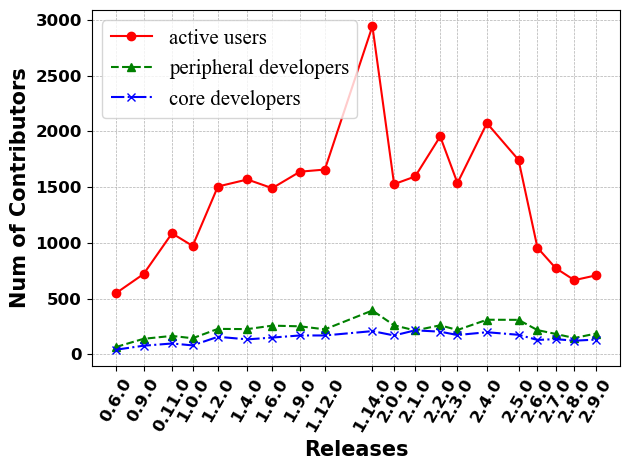

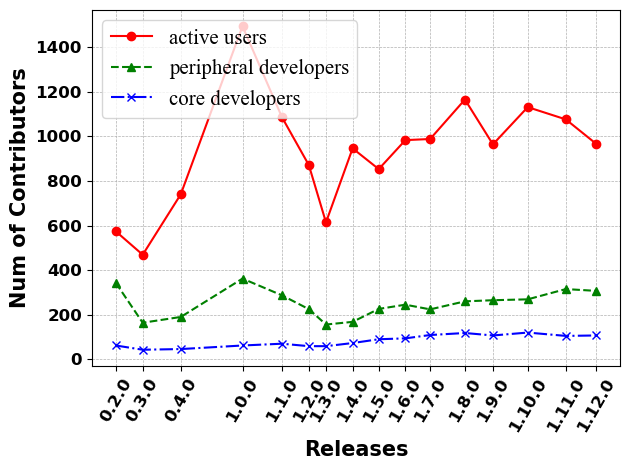

In [13]:
plotter_tensorflow.draw_contributors()
plotter_pytorch.draw_contributors()


Role ratios in deep learning communities across releases

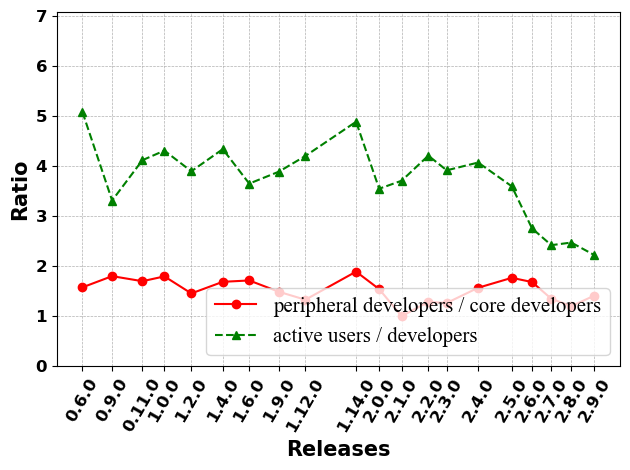

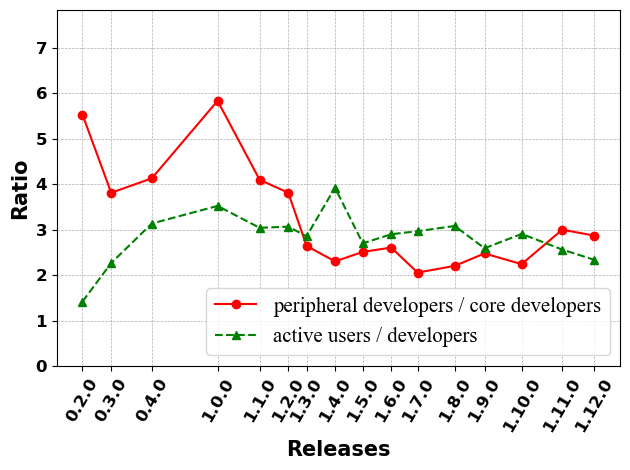

In [14]:
plotter_tensorflow.draw_ratio(show=True,save=True)
plotter_pytorch.draw_ratio(show=True,save=True)

#### Role transition of core developers in deep learning communities across releases

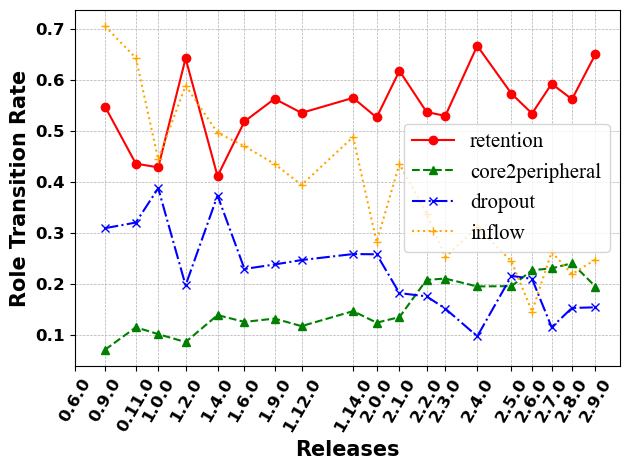

In [15]:
plotter_tensorflow.draw_transition(show=True,save=True)

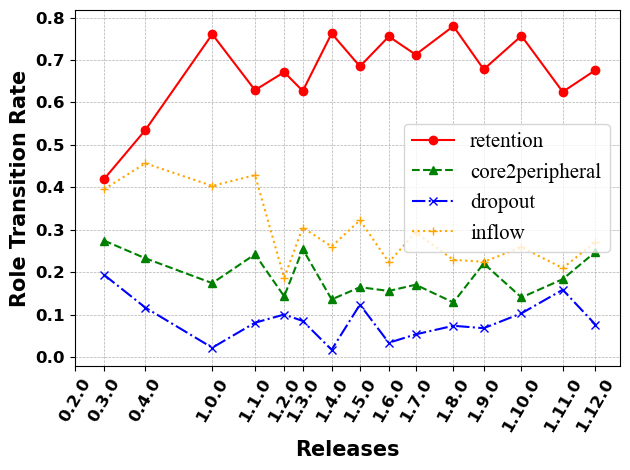

In [16]:
plotter_pytorch.draw_transition(show=True,save=True)

Popularity growth of deep learning projects across releases

2015.12.01
2022.08.01
2016.09.01
2016.10.01
2016.11.01
2016.12.01
2017.01.01
2017.02.01
2017.03.01
2017.04.01
2017.05.01
2017.06.01
2017.07.01
2017.08.01
2017.09.01
2017.10.01
2017.11.01
2017.12.01
2018.01.01
2018.02.01
2018.03.01
2018.04.01
2018.05.01
2018.06.01
2018.07.01
2018.08.01
2018.09.01
2018.10.01
2018.11.01
2018.12.01
2019.01.01
2019.02.01
2019.03.01
2019.04.01
2019.05.01
2019.06.01
2019.07.01
2019.08.01
2019.09.01
2019.10.01
2019.11.01
2019.12.01
2020.01.01
2020.02.01
2020.03.01
2020.04.01
2020.05.01
2020.06.01
2020.07.01
2020.08.01
2020.09.01
2020.10.01
2020.11.01
2020.12.01
2021.01.01
2021.02.01
2021.03.01
2021.04.01
2021.05.01
2021.06.01
2021.07.01
2021.08.01
2021.09.01
2021.10.01
2021.11.01
2021.12.01
2022.01.01
2022.02.01
2022.03.01
2022.04.01
2022.05.01
2022.06.01
2022.07.01
2022.08.01
2015.12.01
2016.01.01
2016.02.01
2016.03.01
2016.04.01
2016.05.01
2016.06.01
2016.07.01
2016.08.01
2016.09.01
2016.10.01
2016.11.01
2016.12.01
2017.01.01
2017.02.01
2017.03.01
2017.04.01

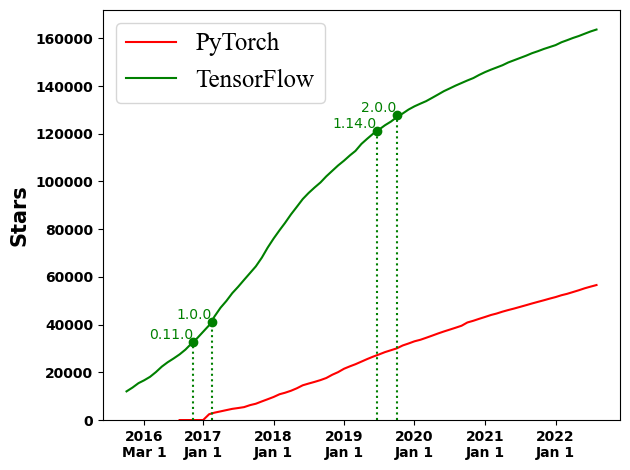

In [17]:
plotter_pytorch.draw_pop(show=True,save=True)

### statistical analysis and man kenall test

pytorch trend

In [13]:
from data_preprocessing.classification import  statistical_analysis_and_mann_kendall_test, role_transition_capture
community_data_pytorch = pd.read_csv('../../data/contributions/releases/pytorch.csv')
role_transition_data_pytorch = role_transition_capture(community_data_pytorch, 'version')
role_transition_data_pytorch.drop([0],inplace=True)
pytorch_trend_data= statistical_analysis_and_mann_kendall_test(role_transition_data_pytorch)
pytorch_trend_data


/home/yunqichen/DLCommunity/deep_learning_communities/src/notebooks/../data_preprocessing/classification.py:152: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  role_transition_result = pd.concat(


    ratio_peri_core  ratio_active_dev retention_rate dropout_rate  \
0          5.532258          1.417284              0            0   
1          3.813953          2.265700       0.419355     0.193548   
2          4.130435          3.135593       0.534884     0.116279   
3          5.838710          3.523585        0.76087     0.021739   
4          4.100000          3.042017       0.629032     0.080645   
5          3.813559          3.066901       0.671429          0.1   
6          2.644068          2.855814       0.627119     0.084746   
7          2.301370          3.925311       0.762712     0.016949   
8          2.511111          2.699367       0.684932     0.123288   
9          2.606383          2.899705       0.755556     0.033333   
10         2.055046          2.966967       0.712766     0.053191   
11         2.203390          3.082011       0.779817     0.073394   
12         2.476636          2.591398       0.677966     0.067797   
13         2.241667          2.907

/home/yunqichen/DLCommunity/deep_learning_communities/src/notebooks/../data_preprocessing/classification.py:266: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  analysis_result = pd.concat(


,metric-rate,min_value,max_value,mean_value,std,trend,p-value
0,retention_rate,0.419355,0.779817,0.671642,0.097299,no trend,0.234955
1,core2peripheral_rate,0.128440,0.274194,0.191024,0.049236,no trend,0.373053
2,dropout_rate,0.016949,0.193548,0.086816,0.048505,no trend,0.921159
3,inflow_rate,0.186441,0.456522,0.297778,0.085842,decreasing,0.022822
4,ratio_peri_core,2.055046,5.838710,3.107032,1.038579,decreasing,0.022822
5,ratio_active_dev,2.265700,3.925311,2.923965,0.426377,no trend,0.113287


In [19]:
pytorch_trend_data.to_csv('../../outputs/results/pytorch_trend_data.csv', index=False)

TensorFlow trend

In [14]:
community_data_tensorflow = pd.read_csv('../../data/contributions/releases/tensorflow.csv')
role_transition_data_tensorflow = role_transition_capture(community_data_tensorflow, "version")
role_transition_data_tensorflow.drop([0],inplace=True)
tensorflow_trend_data = statistical_analysis_and_mann_kendall_test(role_transition_data_tensorflow)
tensorflow_trend_data

/home/yunqichen/DLCommunity/deep_learning_communities/src/notebooks/../data_preprocessing/classification.py:152: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  role_transition_result = pd.concat(


    ratio_peri_core  ratio_active_dev retention_rate dropout_rate  \
0          1.571429          5.074074              0            0   
1          1.794872          3.307339       0.547619     0.309524   
2          1.693878          4.113636       0.435897     0.320513   
3          1.790123          4.305310       0.428571     0.387755   
4          1.449367          3.891473       0.641975     0.197531   
5          1.681481          4.334254       0.411392     0.373418   
6          1.708609          3.645477       0.518519      0.22963   
7          1.482353          3.883886       0.562914     0.238411   
8          1.323529          4.197468       0.535294     0.247059   
9          1.885167          4.882255       0.564706     0.258824   
10         1.535294          3.542923       0.526316     0.258373   
11         0.995370          3.703016       0.617647     0.182353   
12         1.279412          4.204301       0.537037     0.175926   
13         1.258621          3.910

/home/yunqichen/DLCommunity/deep_learning_communities/src/notebooks/../data_preprocessing/classification.py:266: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  analysis_result = pd.concat(


,metric-rate,min_value,max_value,mean_value,std,trend,p-value
0,retention_rate,0.411392,0.666667,0.549246,0.070377,increasing,0.035805
1,core2peripheral_rate,0.071429,0.240876,0.157991,0.052437,increasing,0.000027
2,dropout_rate,0.097701,0.387755,0.225180,0.080513,decreasing,0.001007
3,inflow_rate,0.146154,0.705128,0.389793,0.153187,decreasing,0.000004
4,ratio_peri_core,0.995370,1.885167,1.517020,0.242077,decreasing,0.042442
5,ratio_active_dev,2.215625,4.882255,3.654006,0.727334,decreasing,0.020941


In [21]:
tensorflow_trend_data.to_csv('../../outputs/results/tensorflow_trend_data.csv', index=False)

## RQ3. Impact of Community Characteristics on Project Popularity

In [7]:
# # this may take a few minutes
contribution_table_month_pytorch = pd.read_csv('../../data/contributions/months/pytorch.csv')
star_data_pytorch = pd.read_csv('../../data/raw/stars/pytorch_monthly.csv')
pcmci_data_pytorch = get_pcmci_analysis_data(contribution_table_month_pytorch, star_data_pytorch)
pcmci_data_pytorch.to_csv('../../outputs/results/pcmci_data_pytorch.csv', index=False)


/home/yunqichen/DLCommunity/deep_learning_communities/src/notebooks/../data_preprocessing/classification.py:562: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  pcmci_data = pd.concat([pcmci_data, pd.DataFrame([new_row])], ignore_index=True)


    version active_users core_developers peripheral_developers retention rate  \
0   2016-09            3               5                     8              0   
1   2016-10           10               5                    10            0.8   
2   2016-11            8              10                    33            1.0   
3   2016-12           10              10                    35            0.6   
4   2017-01           75              16                    45            1.0   
..      ...          ...             ...                   ...            ...   
66  2022-03          415              82                   109       0.627907   
67  2022-04          363              81                   121       0.695122   
68  2022-05          392              83                   112       0.740741   
69  2022-06          433              92                   127       0.710843   
70  2022-07          444              93                   118       0.706522   

   inflow rate dropout rate

In [8]:
# # this may take a few minutes
contribution_table_month_tensorflow = pd.read_csv('../../data/contributions/months/tensorflow.csv')
star_data_tensorflow = pd.read_csv('../../data/raw/stars/tensorflow_monthly.csv')
pcmci_data_tensorflow = get_pcmci_analysis_data(contribution_table_month_tensorflow, star_data_tensorflow)
pcmci_data_tensorflow.to_csv('../../outputs/results/pcmci_data_tensorflow.csv', index=False)

/home/yunqichen/DLCommunity/deep_learning_communities/src/notebooks/../data_preprocessing/classification.py:562: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  pcmci_data = pd.concat([pcmci_data, pd.DataFrame([new_row])], ignore_index=True)


    version active_users core_developers peripheral_developers retention rate  \
0   2015-12          182              21                    19              0   
1   2016-01          151              34                    30       0.571429   
2   2016-02          167              35                    44       0.617647   
3   2016-03          196              41                    35       0.657143   
4   2016-04          218              39                    36       0.512195   
..      ...          ...             ...                   ...            ...   
75  2022-03          283              94                   105       0.586957   
76  2022-04          250             100                    80        0.62766   
77  2022-05          251              84                    93           0.51   
78  2022-06          286              79                    89       0.488095   
79  2022-07          273             102                    81       0.594937   

   inflow rate dropout rate

/home/yunqichen/DLCommunity/deep_learning_communities/src/notebooks/../rq3_Impact_of_Community_Characteristics.py:51: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  data = data.applymap(lambda x: x + 0.0000001 if x == 0 else x)


tau_max: 12

## Significant links at alpha = 0.01:

    Variable active_users has 2 link(s):
        (stars -5): pval = 0.00529 | val =  0.449
        (inflow rate -6): pval = 0.00610 | val =  0.437

    Variable core_developers has 1 link(s):
        (core_developers -3): pval = 0.00861 | val =  0.415

    Variable peripheral_developers has 3 link(s):
        (peripheral_developers -1): pval = 0.00093 | val =  0.522
        (inflow rate -10): pval = 0.00145 | val = -0.498
        (dropout rate -5): pval = 0.00686 | val = -0.426

    Variable retention rate has 4 link(s):
        (core-to-peri rate  0): pval = 0.00013 | val = -0.587
        (retention rate -1): pval = 0.00095 | val = -0.521
        (active_users -2): pval = 0.00103 | val =  0.518
        (core-to-peri rate -2): pval = 0.00116 | val =  0.507

    Variable inflow rate has 2 link(s):
        (active_users -3): pval = 0.00254 | val =  0.476
        (stars -9): pval = 0.00891 | val =  0.424

    Variable dropout rate has 3 

/home/yunqichen/DLCommunity/deep_learning_communities/src/notebooks/../rq3_Impact_of_Community_Characteristics.py:546: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, new_df], ignore_index=True)
/home/yunqichen/DLCommunity/deep_learning_communities/src/notebooks/../rq3_Impact_of_Community_Characteristics.py:51: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  data = data.applymap(lambda x: x + 0.0000001 if x == 0 else x)


tau_max: 12

## Significant links at alpha = 0.01:

    Variable active_users has 3 link(s):
        (active_users -1): pval = 0.00001 | val =  0.604
        (inflow rate -9): pval = 0.00157 | val =  0.453
        (peripheral_developers  0): pval = 0.00567 | val =  0.397

    Variable core_developers has 3 link(s):
        (inflow rate  0): pval = 0.00079 | val =  0.478
        (retention rate  0): pval = 0.00178 | val =  0.448
        (core-to-peri rate  0): pval = 0.00694 | val = -0.381

    Variable peripheral_developers has 3 link(s):
        (core-to-peri rate -9): pval = 0.00217 | val = -0.420
        (active_users  0): pval = 0.00567 | val =  0.397
        (core_developers -6): pval = 0.00906 | val =  0.377

    Variable retention rate has 7 link(s):
        (core-to-peri rate  0): pval = 0.00000 | val = -0.701
        (core_developers  0): pval = 0.00178 | val =  0.448
        (peripheral_developers -1): pval = 0.00201 | val =  0.431
        (dropout rate -1): pval = 0.00359 | 

/home/yunqichen/DLCommunity/deep_learning_communities/src/notebooks/../rq3_Impact_of_Community_Characteristics.py:546: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, new_df], ignore_index=True)


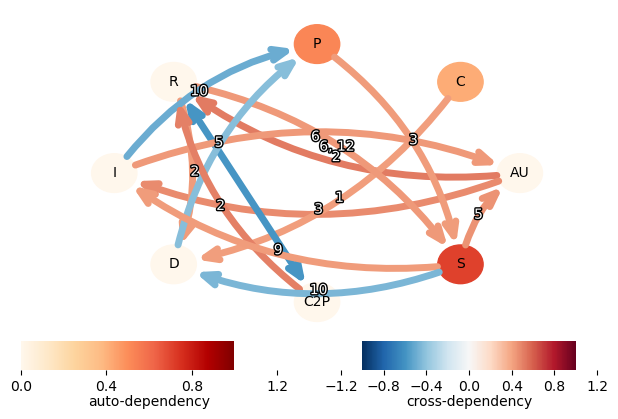

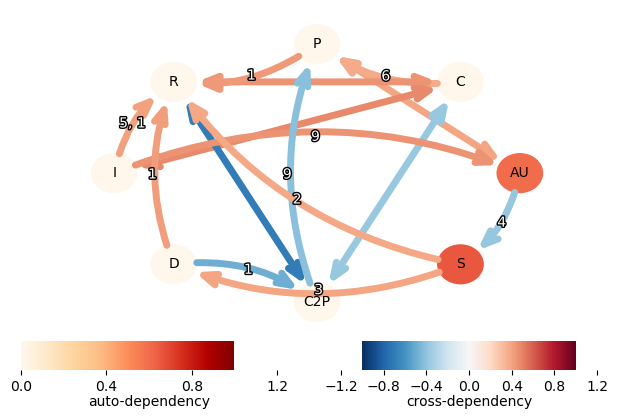

In [3]:
for community_name in ['pytorch', 'tensorflow']:
    data = load_and_process_data(f'../../outputs/results/pcmci_data_{community_name}.csv')
    save_dir = '../../outputs/figures/'
    fig = causal_inference(
        data,
        community_name=community_name,
        tmax=12,
        tmin=0,
        cond_choice="ParCorr",
        alpha_level=0.01,
        save_dir=save_dir,
        tmax_=None,
    )
    fig

# Discussion: Kappa Analysis

In [2]:
df = pd.read_csv("../../data/contributions/global/pytorch.csv")
# print(role_classification(df))
(
    result_each_metric_df,
    core_set,
    peripheral_set,
    dev_set,
    active_set,
) = role_classification(df)

kappa_result = kappa_calculation(result_each_metric_df, dev_set)
kappa_result

,commit_count,LOC,issue_count,central_degree
commit_count,1.0,0.646791,0.793451,0.555336
LOC,0.0,1.000000,0.581725,0.544515
issue_count,0.0,0.000000,1.000000,0.588237
central_degree,0.0,0.000000,0.000000,1.000000


In [3]:
# change column name into [Commit Count, LOC, Issue Count, Network]
kappa_result.columns = ["Commit Count", "LOC Count", "Issue Count", "Issue Network"]
# change index = [Commit Count, LOC, Issue Count, Network]
kappa_result.index = ["Commit Count", "LOC Count", "Issue Count", "Issue Network"]
kappa_result

,Commit Count,LOC Count,Issue Count,Issue Network
Commit Count,1.0,0.646791,0.793451,0.555336
LOC Count,0.0,1.000000,0.581725,0.544515
Issue Count,0.0,0.000000,1.000000,0.588237
Issue Network,0.0,0.000000,0.000000,1.000000


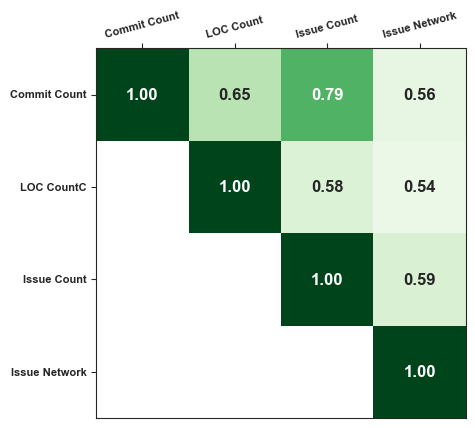

In [4]:
# change column name into [Commit Count, LOC, Issue Count, Network]
kappa_result.columns = ["Commit Count", "LOC Count", "Issue Count", "Issue Network"]
# change index = [Commit Count, LOC, Issue Count, Network]
kappa_result.index = ["Commit Count", "LOC CountC", "Issue Count", "Issue Network"]
kappa_result
draw_kappa_matrix(kappa_result, save_path="../../outputs/figures/kappa_pytorch.pdf",show=True)

In [5]:
df = pd.read_csv("../../data/contributions/global/tensorflow.csv")
# print(role_classification(df))
(
    result_each_metric_df,
    core_set,
    peripheral_set,
    dev_set,
    active_set,
) = role_classification(df)

kappa_result = kappa_calculation(result_each_metric_df, dev_set)
kappa_result

,commit_count,LOC,issue_count,central_degree
commit_count,1.0,0.610221,0.155552,0.492496
LOC,0.0,1.000000,0.076715,0.482861
issue_count,0.0,0.000000,1.000000,0.241197
central_degree,0.0,0.000000,0.000000,1.000000


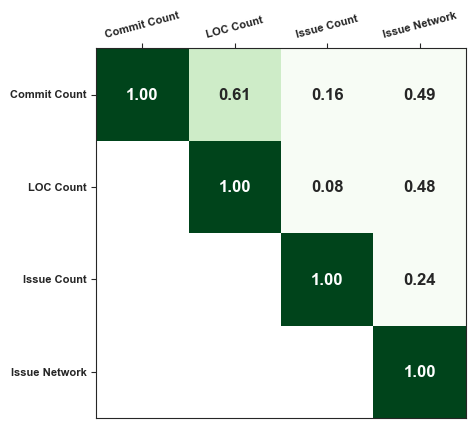

In [6]:
# change column name into [Commit Count, LOC, Issue Count, Network]
kappa_result.columns = ["Commit Count", "LOC Count", "Issue Count", "Issue Network"]
# change index = [Commit Count, LOC, Issue Count, Network]
kappa_result.index = ["Commit Count", "LOC Count", "Issue Count", "Issue Network"]
kappa_result
draw_kappa_matrix(kappa_result, save_path="../../outputs/figures/kappa_tensorflow.pdf",show=True)